# Diffusion coefficient of molecules using center of mass

`Kinisi` includes the ability to calculate the mean-squared displacement and diffusion coefficient of the center of mass (or geometry) of molecules. This can be done for a single molecule or a collection of molecules. It is important to note that inclusion of rotational motion in the calcuation of diffusion coeffiencents can lead to erronious results. This rotation can be elminated from the calculation by taking the center of mass for each molecule.

In [4]:
import numpy as np
from ase.io import read
import matplotlib.pyplot as plt
from kinisi.analyze import DiffusionAnalyzer

We will use a simulation of ethene in ZSM-5 zeolite. This was run in DL_POLY, so we will use `ASE` to load in the trajectory (HISTORY) file. 

In [8]:
traj = read('ethene_zeo_HISTORY.gz', format='dlp-history', index=':')

We want to calculate the diffusion of the center of mass of the ethene molecule. This can be done by setting `specie` to None and specifying the indices of the molecules of interest in `specie_indices`. To define molecules, a list of lists should be passed under the `specie_indices` keyword. The outer list has one entry per molecule and each inter list has the indices of that molecule. Only identical molecules are supported. The masses of the atoms in the molecules can be specified with `masses`. This must be a list with the same length as a molecule (the length of one of the inner lists in `specie_indices`).

In [9]:
molecules = [[289, 290, 291,   292,   293,   294],
             [285, 296, 297,   298,   299,   300]]
masses    =  [12,  12,  1.008, 1.008, 1.008, 1.008]

p_parms = {'specie': None,
           'time_step': 1.2e-03,
           'step_skip': 100,
           'specie_indices': molecules,
           'masses': masses
           }

With the parameters set, we now calcuate the mean squared-displacement.

In [10]:
diff = DiffusionAnalyzer.from_ase(traj, parser_params=p_parms)

Finding Means and Variances: 100%|██████████| 100/100 [00:00<00:00, 400.00it/s]


<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\jd15489\AppData\Local\Temp\ipykernel_28356\1339953560.py:3: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta t$/ps')


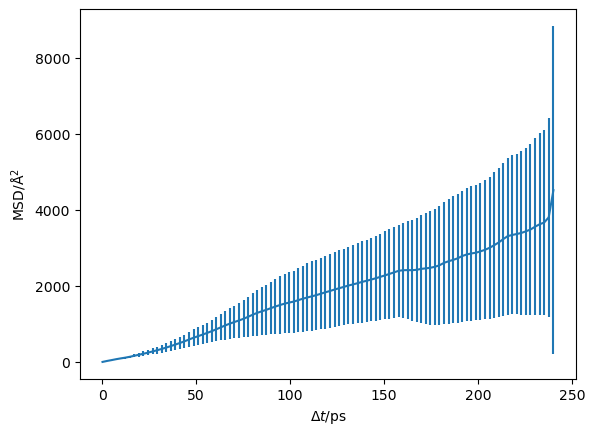

In [11]:
plt.errorbar(diff.dt, diff.msd, diff.msd_std)
plt.ylabel('MSD/Å$^2$')
plt.xlabel('$\Delta t$/ps')
plt.show()

In [12]:
diff.diffusion(50)

Likelihood Sampling: 100%|██████████| 1500/1500 [00:01<00:00, 1071.43it/s]


In [13]:
diff.D.n, diff.D.ci()

(0.00031690297528057444, array([4.13019910e-05, 6.39754915e-04]))

In [14]:
diff.intercept.n, diff.intercept.ci()

(-280.37941081925067, array([-1150.88543865,   493.77492333]))

In [15]:
diff.D.samples

array([7.52230793e-05, 2.08521886e-04, 2.76575729e-04, ...,
       2.08478153e-04, 3.38567253e-04, 9.57985941e-05])

<>:12: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
C:\Users\jd15489\AppData\Local\Temp\ipykernel_28356\3535502220.py:12: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta t$/ps')


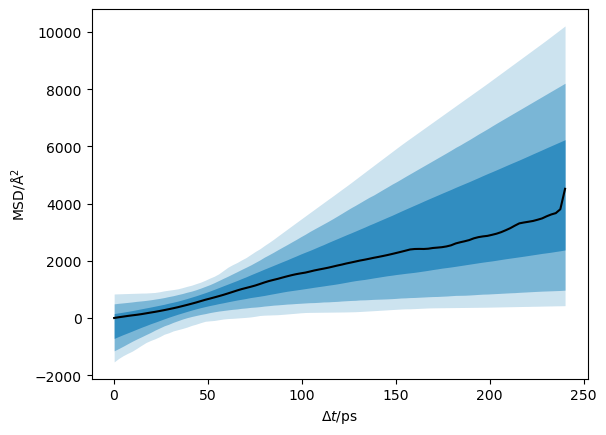

In [16]:
credible_intervals = [[16, 84], [2.5, 97.5], [0.15, 99.85]]
alpha = [0.6, 0.4, 0.2]

plt.plot(diff.dt, diff.msd, 'k-')
for i, ci in enumerate(credible_intervals):
    plt.fill_between(diff.dt,
                     *np.percentile(diff.distribution, ci, axis=1),
                     alpha=alpha[i],
                     color='#0173B2',
                     lw=0)
plt.ylabel('MSD/Å$^2$')
plt.xlabel('$\Delta t$/ps')
plt.show()

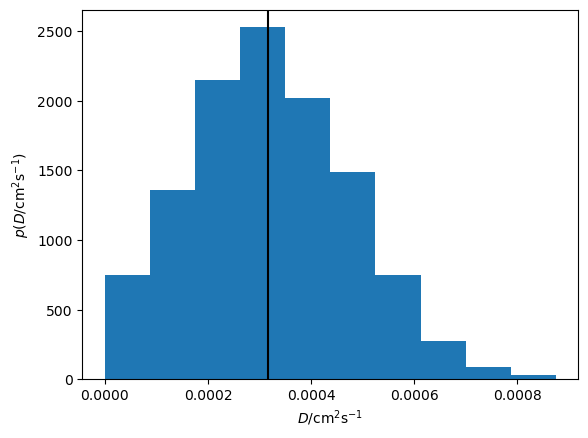

In [17]:
plt.hist(diff.D.samples, density=True)
plt.axvline(diff.D.n, c='k')
plt.xlabel('$D$/cm$^2$s$^{-1}$')
plt.ylabel('$p(D$/cm$^2$s$^{-1})$')
plt.show()